# Similarity Solutions for Steady Two-dimensional Flow

## The Blasius Solution for Flat-Plate Flow


\begin{equation}
f^{'''} + f f^{''} = 0
\end{equation}

with the no-slip conditions $u(x,0) = v(x,0) = 0$ and the freestream-merge condition, $u(x,\infty) = U$, convert to

\begin{align}
& f^{'}(0) = f(0) = 0 \\
& f^{'}(\infty) = 1
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ode

In [2]:
def fblasius(t, y):
    """
    The Blasius equation for the solution to a laminar boundary layer
    converted into a system of first-order ODE's.
    """
    return [y[1], y[2], -y[0]*y[2]]

In [3]:
def dsfunction(phi0,phi1,s0,s1):
    if (abs(phi1-phi0)>0.0):   
        return    -phi1 *(s1 - s0)/float(phi1 - phi0)
    else:
        return 0.0

solver = ode.euler
    
xmin = 0
xmax = 5.750

N = 400  # no x-values
x = np.linspace(xmin, xmax, N+1)

# Guessed values
s=[0.1,0.8]

z0 = np.zeros(3)
z0[2] = s[0]

beta = 1.0 #Boundary value for eta=infty

## Compute phi0

u = solver(fblasius, z0, x)
phi0 = u[-1,1] - beta

nmax=10
eps = 1.0e-3
for n in range(nmax):
    z0[2] = s[1]
    u = solver(fblasius, z0, x)
    phi1 = u[-1,1] - beta
    ds = dsfunction(phi0,phi1,s[0],s[1])
    s[0]  = s[1]
    s[1]  += ds
    phi0 = phi1
    print('n = {}  s1 = {} and ds = {}'.format(n,s[1],ds))
    
    if (abs(ds)<=eps):
        print('Solution converged for eps = {} and s1 ={} and ds = {}. \n'.format(eps,s[1],ds))
        break

n = 0  s1 = 0.5168454439670535 and ds = -0.2831545560329466
n = 1  s1 = 0.45946274534749215 and ds = -0.05738269861956132
n = 2  s1 = 0.4646853908292342 and ds = 0.005222645481742035
n = 3  s1 = 0.46459292473573505 and ds = -9.246609349916264e-05
Solution converged for eps = 0.001 and s1 =0.46459292473573505 and ds = -9.246609349916264e-05. 



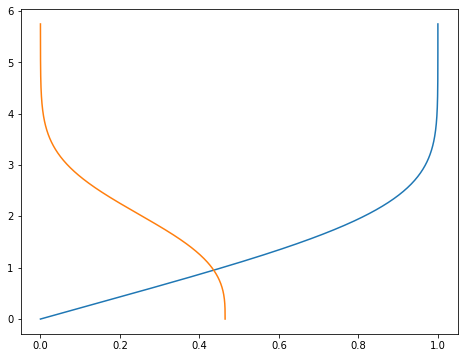

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
fig.tight_layout(rect=(0.05,0.05,0.9,0.9))

ax.plot(u[:,1], x)
ax.plot(u[:,2], x)

